In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics._regression import root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr



   Gestosc  Pct.BF  Wiek    Waga  Wzrost  Szyja  Klatka  Brzuch      Talia  \
0   1.0708    12.3    23  154.25   67.75   36.2    93.1    85.2  33.543307   
1   1.0853     6.1    22  173.25   72.25   38.5    93.6    83.0  32.677165   
2   1.0414    25.3    22  154.00   66.25   34.0    95.8    87.9  34.606299   
3   1.0751    10.4    26  184.75   72.25   37.4   101.8    86.4  34.015748   
4   1.0340    28.7    24  184.25   71.25   34.4    97.3   100.0  39.370079   

   Biodro   Udo  Kolano  Kostka  Biceps  Przedramie  Nadgarstek  
0    94.5  59.0    37.3    21.9    32.0        27.4        17.1  
1    98.7  58.7    37.3    23.4    30.5        28.9        18.2  
2    99.2  59.6    38.9    24.0    28.8        25.2        16.6  
3   101.2  60.1    37.3    22.8    32.4        29.4        18.2  
4   101.9  63.2    42.2    24.0    32.2        27.7        17.7  
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:      

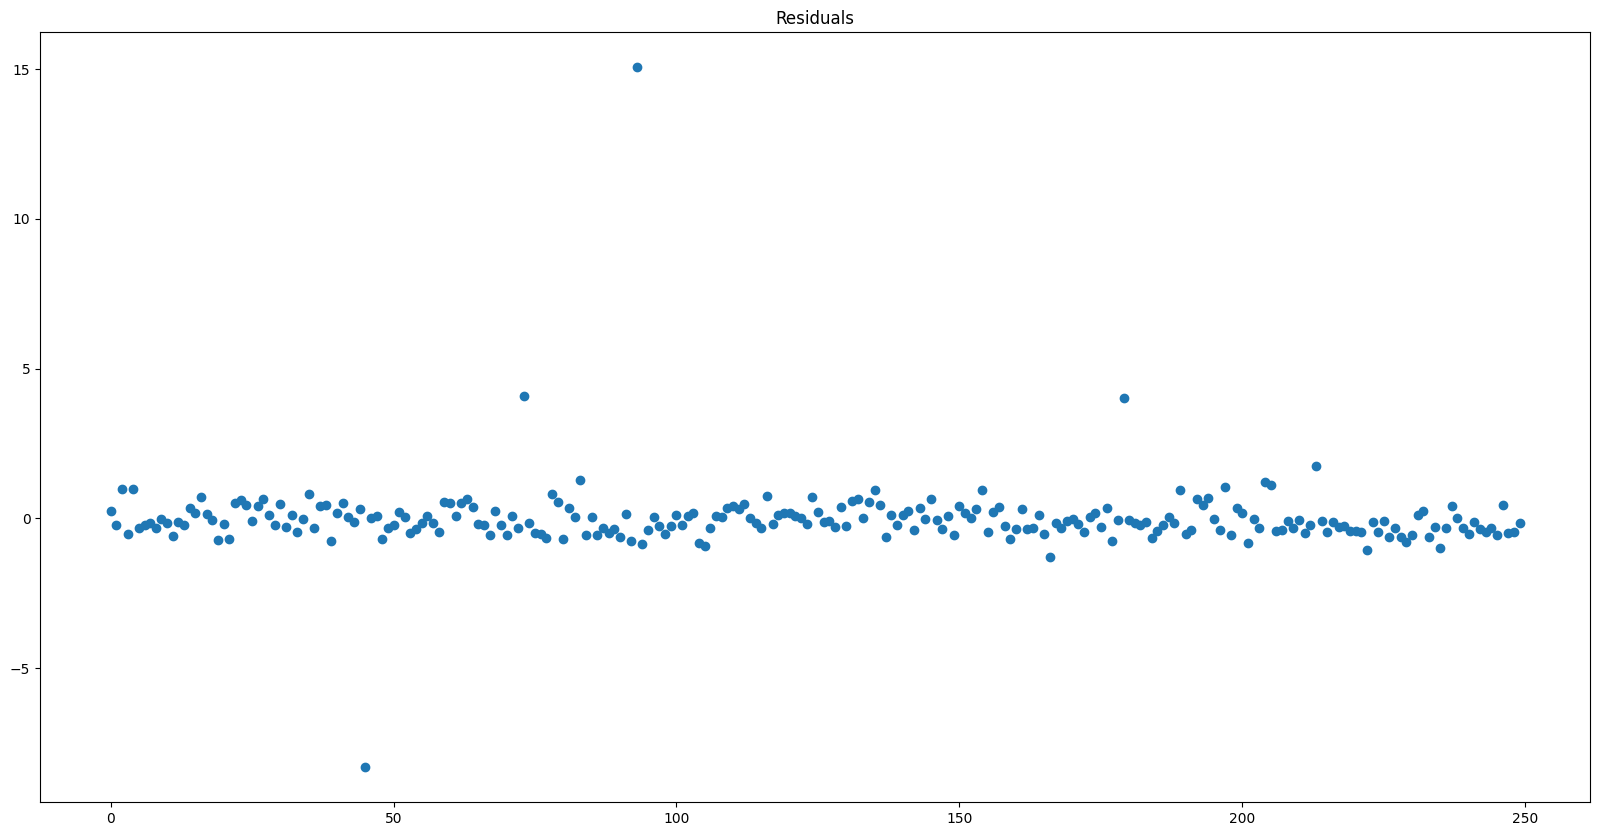

     Gestosc  Pct.BF  Wiek    Waga  Wzrost  Szyja  Klatka  Brzuch      Talia  \
0     1.0708    12.3    23  154.25   67.75   36.2    93.1    85.2  33.543307   
1     1.0853     6.1    22  173.25   72.25   38.5    93.6    83.0  32.677165   
2     1.0414    25.3    22  154.00   66.25   34.0    95.8    87.9  34.606299   
3     1.0751    10.4    26  184.75   72.25   37.4   101.8    86.4  34.015748   
4     1.0340    28.7    24  184.25   71.25   34.4    97.3   100.0  39.370079   
..       ...     ...   ...     ...     ...    ...     ...     ...        ...   
245   1.0736    11.0    70  134.25   67.00   34.9    89.2    83.6  32.913386   
246   1.0236    33.6    72  201.00   69.75   40.9   108.5   105.0  41.338583   
247   1.0328    29.3    72  186.75   66.00   38.9   111.1   111.5  43.897638   
248   1.0399    26.0    72  190.75   70.50   38.9   108.3   101.3  39.881890   
249   1.0271    31.9    74  207.50   70.00   40.8   112.4   108.5  42.716535   

     Biodro   Udo  Kolano  Kostka  Bice

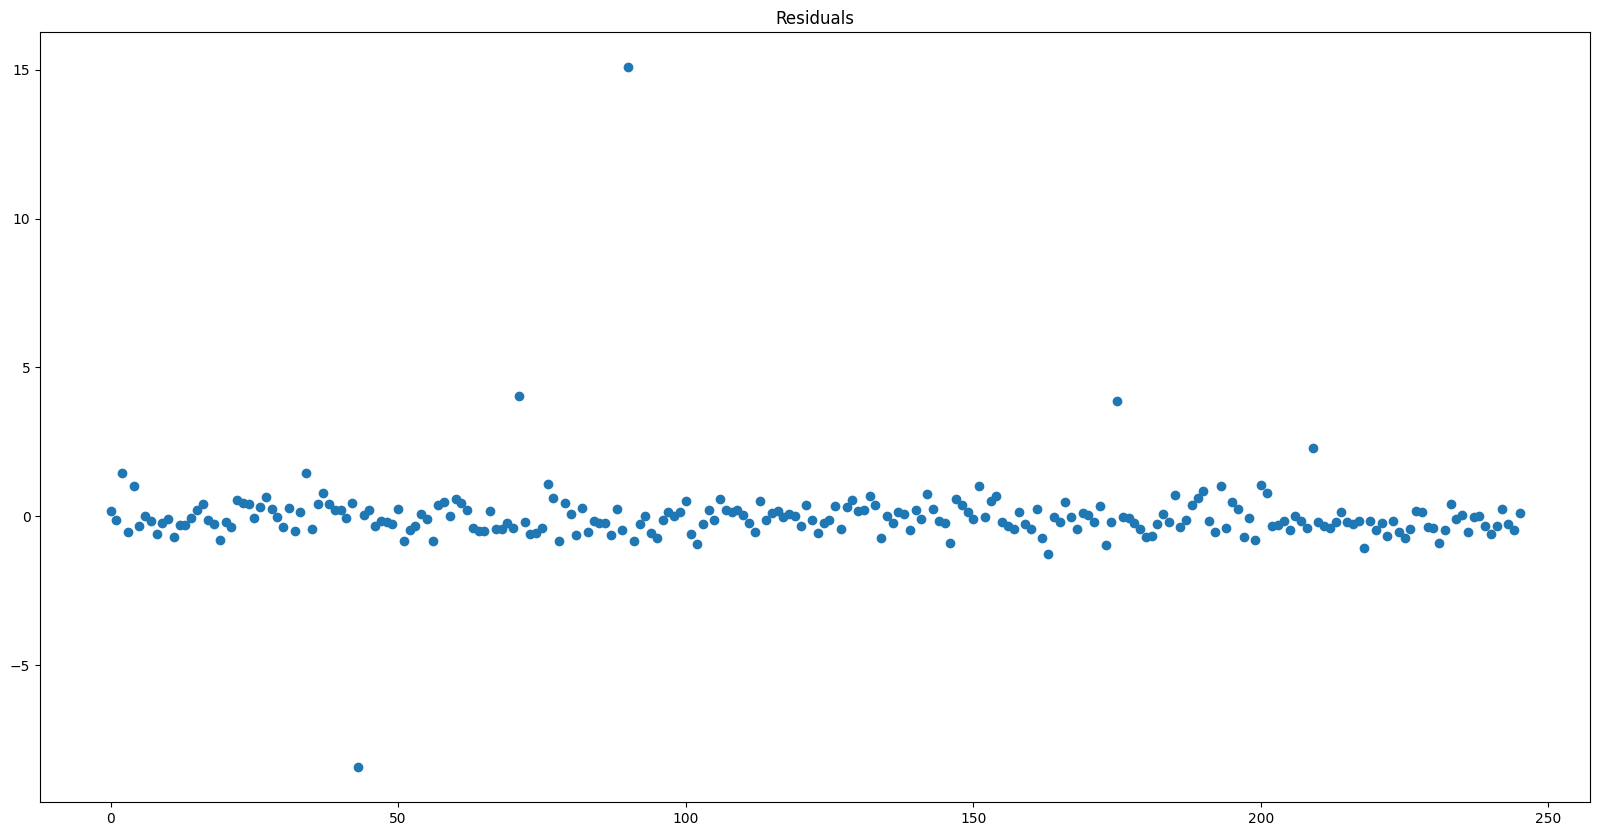

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2556.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          5.45e-196
Time:                        16:19:33   Log-Likelihood:                -404.33
No. Observations:                 246   AIC:                             818.7
Df Residuals:                     241   BIC:                             836.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        456.6679      6.599     69.207      0.0

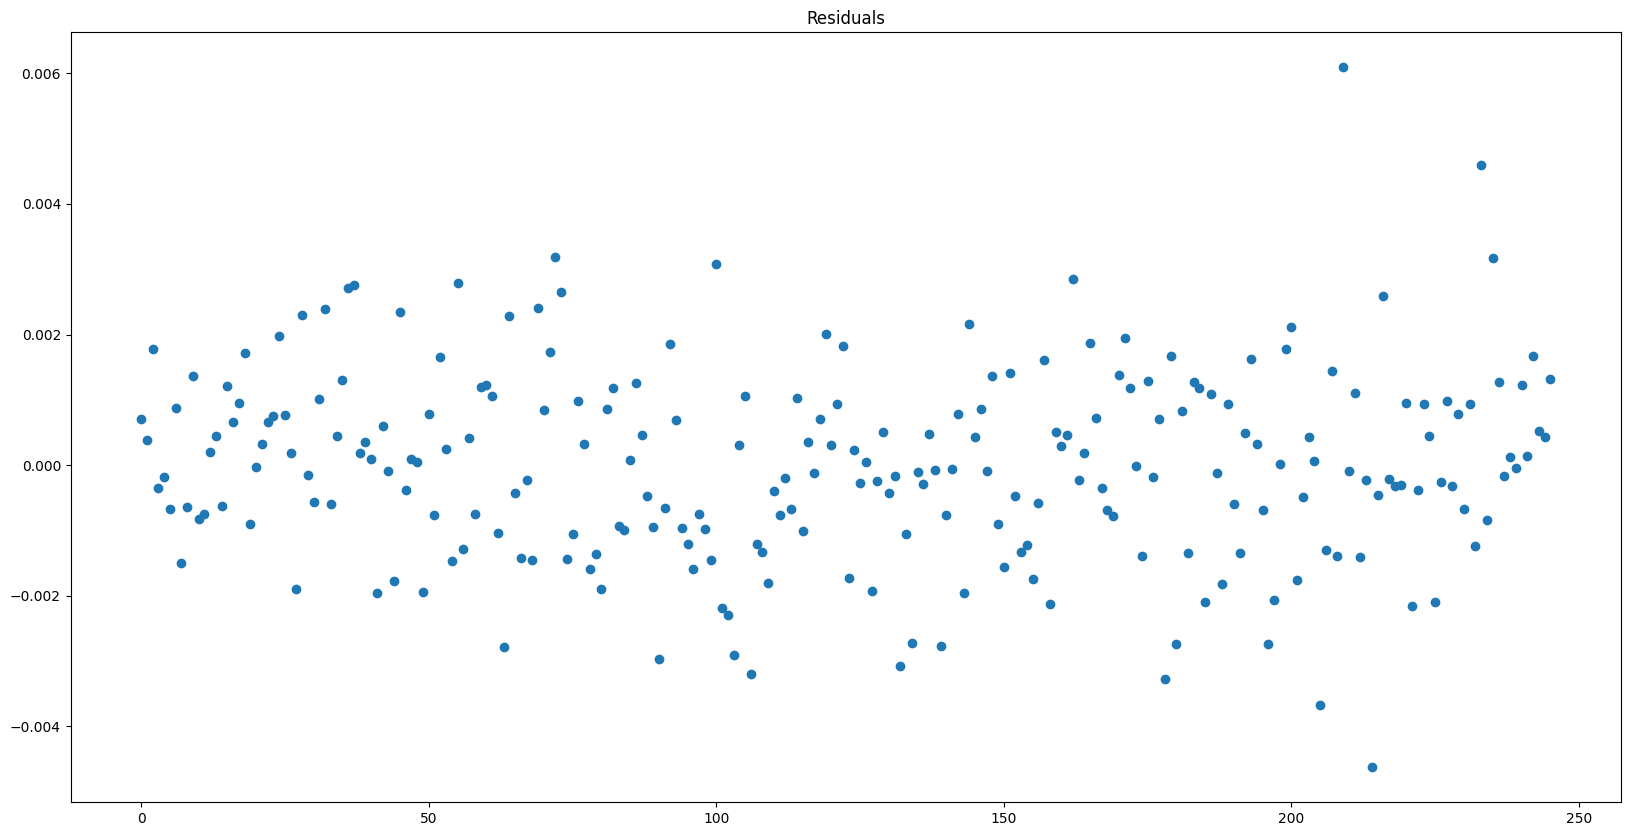

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          6.30e-116
Time:                        16:19:33   Log-Likelihood:                 1254.2
No. Observations:                 246   AIC:                            -2496.
Df Residuals:                     240   BIC:                            -2475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0142      0.002     -7.755      0.0

In [46]:
# Wczytaj dane
data_set_lab1_2 = pd.read_csv("Dane_lab1_2.csv", sep=";")

print(data_set_lab1_2.head())

# Konwersja do NumPy
data_array = np.array(data_set_lab1_2)

# Alternatywnie, jako DataFrame Pandas (lepsze do manipulacji i analizy)
data_frame = pd.DataFrame(data_set_lab1_2)
# model liniowy wielu zmiennych a1*x1 + a2*x2 + ... + aN*xN + b
# zmienna zależna to Pct.BF
X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
Y=data_frame['Pct.BF']
model = sm.OLS(Y, X).fit()

print(model.summary())
# wykresy
plt.figure(figsize=(20, 10))
plt.plot(model.resid, 'o')
plt.title('Residuals')
plt.show()

print(data_frame)
#
# # usun zmienna najmniej istotna
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# print(model.summary())
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# print(model.summary())
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# #test grubbsa
# def test_grubbs(residuals):
#     mean_residual = np.mean(residuals)
#     std_residual = np.std(residuals)
#     max_residual = np.max(residuals)
#     n = len(residuals)
#     G = (max_residual - mean_residual) / std_residual
#     t = 0.95
#     critical_value = (n - 1) / np.sqrt(n) * np.sqrt(np.square(t) / (n - 2 + np.square(t)))
#     if G > critical_value:
#         return True
#     else:
#         return False

# usun linie 32 , 41, 85, 174
data_frame = data_frame.drop([30, 39, 83, 172])
# reindex
data_frame = data_frame.reset_index(drop=True)
print(data_frame)

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())


# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Talia', 'Biodro', 'Udo','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())


# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Talia', 'Biodro','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())


# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Talia', 'Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka' , 'Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga' , 'Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga' , 'Kostka']])
Y=data_frame['Pct.BF']
model = sm.OLS(Y, X).fit()

# wykresy
plt.figure(figsize=(20, 10))
plt.plot(model.resid, 'o')
plt.title('Residuals')
plt.show()

print(model.summary())


bmi = data_frame['Waga'] / np.square(data_frame['Wzrost'])
# dodaj kolumne BMI
data_frame['BMI'] = bmi

# X=sm.add_constant(data_frame[['Wiek', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

#
# X=sm.add_constant(data_frame[['Wiek',  'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

#Nadgarstek

# X=sm.add_constant(data_frame[['Wiek',  'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#

# Kostka
# X=sm.add_constant(data_frame[['Wiek',  'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# # Wiek
# X=sm.add_constant(data_frame[['Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
# print(model.summary())

#
# # Biodro
# X=sm.add_constant(data_frame[['Klatka', 'Brzuch', 'Talia', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
# print(model.summary())

# brzuch
# X=sm.add_constant(data_frame[['Klatka', 'Talia', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
# print(model.summary())


# biceps
X=sm.add_constant(data_frame[['Klatka', 'Talia', 'Udo', 'Kolano', 'Przedramie']])
Y=data_frame['BMI']
model = sm.OLS(Y, X).fit()

# wykresy
plt.figure(figsize=(20, 10))
plt.plot(model.resid, 'o')
plt.title('Residuals')
plt.show()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     468.1
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          1.91e-135
Time:                        16:19:33   Log-Likelihood:                -334.68
No. Observations:                 196   AIC:                             701.4
Df Residuals:                     180   BIC:                             753.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        440.9517     14.452     30.512      0.0

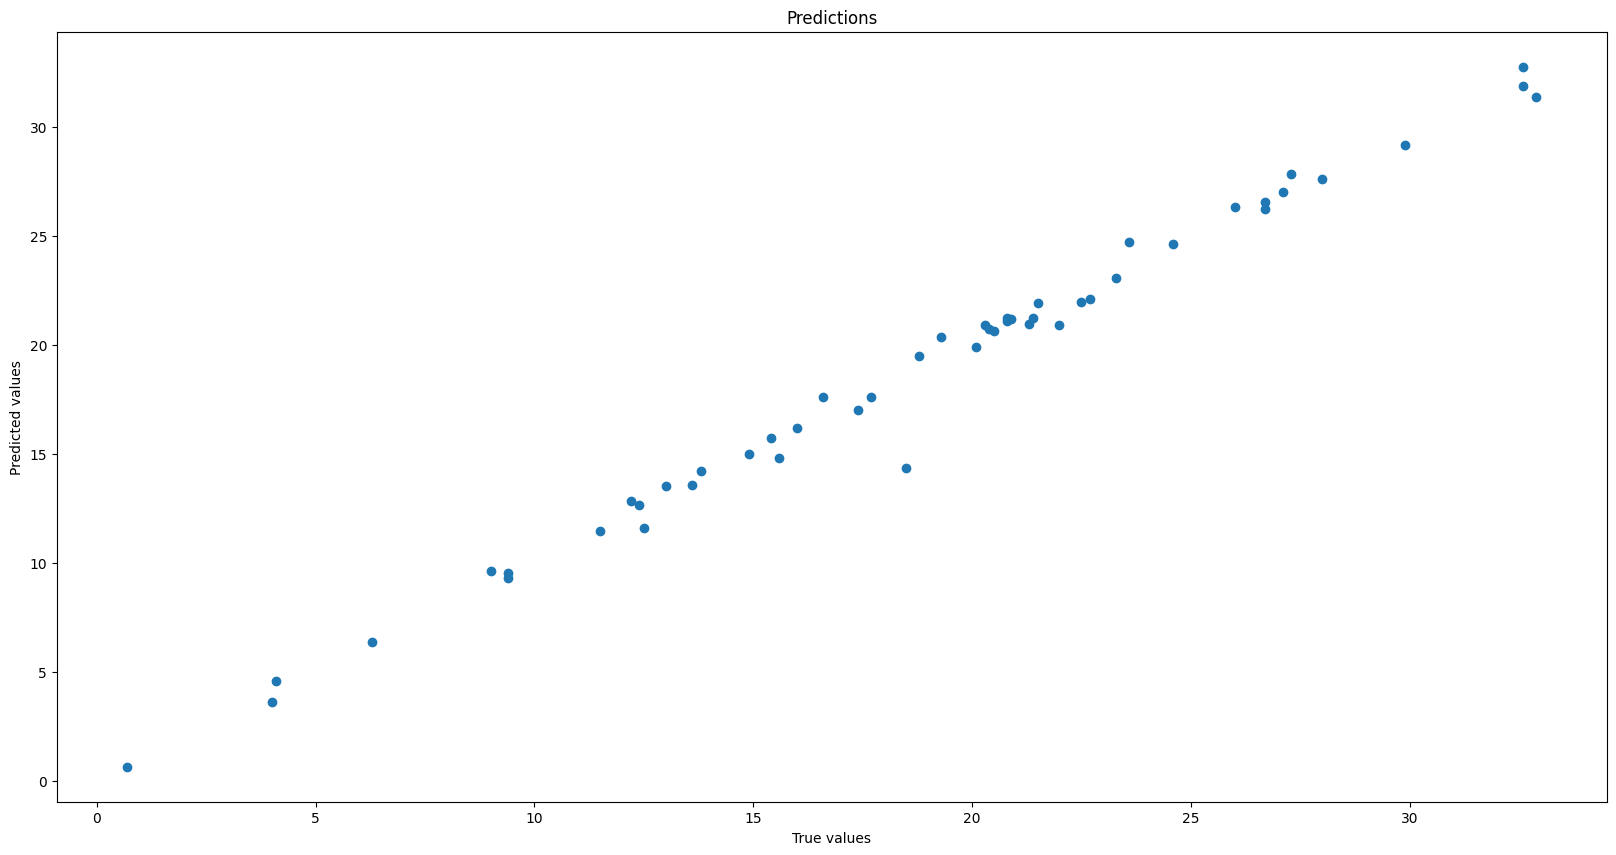

MAE:  0.7994935312911435
RMSE:  0.7994935312911435
ME:  0.06637801076146911
MPE:  0.002316169341384805
MAPE:  0.032097522508074856
Pearson correlation Gestosc: -0.987
Pearson correlation Wiek: 0.293
Pearson correlation Waga: 0.614
Pearson correlation Kostka: 0.285
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     6485.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          4.84e-151
Time:                        16:19:33   Log-Likelihood:                -349.41
No. Observations:                 196   AIC:                             702.8
Df Residuals:                     194   BIC:                             709.4
Df Model:                           1                                         
Covariance Type:        

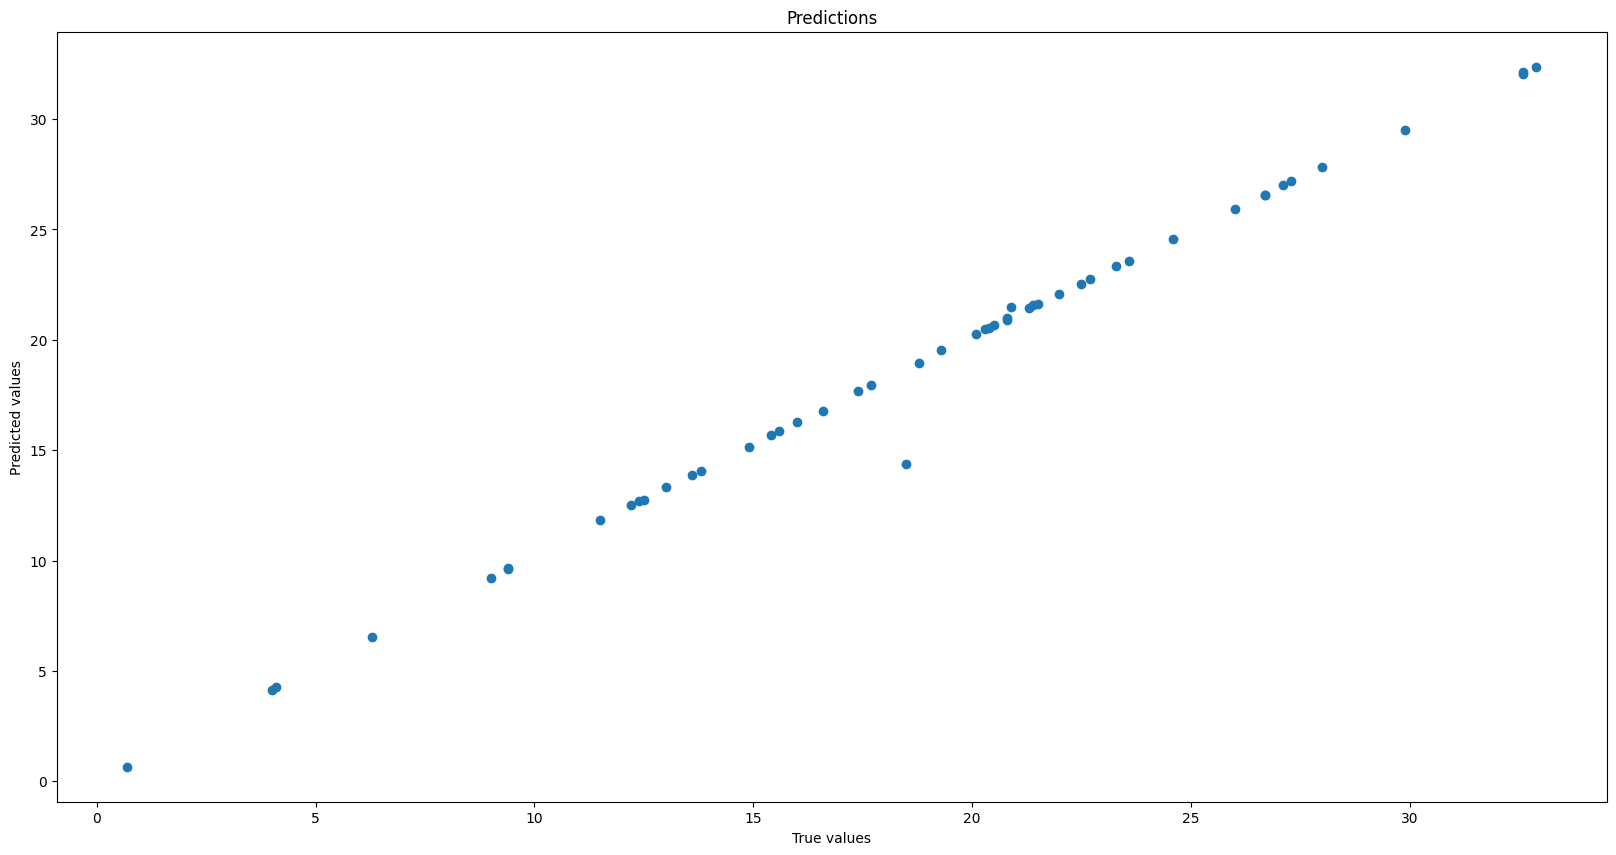

MAE:  0.6335200334570877
RMSE:  0.6335200334570877
ME:  -0.01670834647075516
MPE:  -0.004390061927982025
MAPE:  0.01894164150736025
Pearson correlation Gestosc: -0.987


In [47]:
# podziel dane na zbiór uczący i testowy
#train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']], data_frame['Pct.BF'], test_size=0.2, random_state=0)
X_test=sm.add_constant(X_test)
X_train=sm.add_constant(X_train)

model = sm.OLS(Y_train, X_train).fit()
print(model.summary())
#obliczanie predykcji
predictions = model.predict(X_test)

# porównanie predykcji z wartościami rzeczywistymi
plt.figure(figsize=(20, 10))
plt.plot(Y_test, predictions, 'o')
plt.title('Predictions')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

# obliczanie błędu

def calculate_mae(y_true, y_pred):
    return root_mean_squared_error(y_true, y_pred)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_me(y_true, y_pred):
    return np.mean(y_true - y_pred)
def calculate_mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)
def calculate_u2(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
def calculate_um(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum(np.abs(y_true - np.mean(y_true)))
def calculate_ur(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) ** 2)
def calculate_ud(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) / 2)

print('MAE: ', calculate_mae(Y_test, predictions))
print('RMSE: ', calculate_rmse(Y_test, predictions))
print('ME: ', calculate_me(Y_test, predictions))
print('MPE: ', calculate_mpe(Y_test, predictions))
print('MAPE: ', calculate_mape(Y_test, predictions))

#współczynnik Pearsona R-persona

# corr, _ = pearsonr(, Y_test)
# print('Pearson correlation: %.3f' % corr)
#'Gestosc', 'Wiek', 'Waga' , 'Kostka'

corr, _ = pearsonr(data_frame['Gestosc'], data_frame['Pct.BF'])
print('Pearson correlation Gestosc: %.3f' % corr)
corr, _ = pearsonr(data_frame['Wiek'], data_frame['Pct.BF'])
print('Pearson correlation Wiek: %.3f' % corr)
corr, _ = pearsonr(data_frame['Waga'], data_frame['Pct.BF'])
print('Pearson correlation Waga: %.3f' % corr)
corr, _ = pearsonr(data_frame['Kostka'], data_frame['Pct.BF'])
print('Pearson correlation Kostka: %.3f' % corr)


# w wyniku analizy
# Pearson correlation Gestosc: -0.987
# Pearson correlation Wiek: 0.293
# Pearson correlation Waga: 0.614
# Pearson correlation Kostka: 0.285
# gdzie przedział
# od 0.7 do 1 lub -0.7 do -1 oznacza silną korelację,
# od 0.3 do 0.7 lub -0.3 do -0.7 oznacza umiarkowaną korelację, a
# od 0 do 0.3 lub -0 do -0.3 oznacza słabą korelację
# wyciągamy wnioski, że zmienna Gestosc ma silną korelację z Pct.BF, a Wiek, Waga, Kostka mają słabą korelację z Pct.BF

# w wyniku analizy tworzymy model liniowy zmienna zależna Pct.BF, a niezależne Gestosc oraz stałą
X_train_zkorelowane = X_train[['const', 'Gestosc']]
X_test_zkorelowane = X_test[['const', 'Gestosc']]
model = sm.OLS(Y_train, X_train_zkorelowane).fit()
print(model.summary())
predictions = model.predict(X_test_zkorelowane)
plt.figure(figsize=(20, 10))
plt.plot(Y_test, predictions, 'o')
plt.title('Predictions')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()
print('MAE: ', calculate_mae(Y_test, predictions))
print('RMSE: ', calculate_rmse(Y_test, predictions))
print('ME: ', calculate_me(Y_test, predictions))
print('MPE: ', calculate_mpe(Y_test, predictions))
print('MAPE: ', calculate_mape(Y_test, predictions))
corr, _ = pearsonr(data_frame['Gestosc'], data_frame['Pct.BF'])
print('Pearson correlation Gestosc: %.3f' % corr)
#
